In [1]:
import pandas as pd

# Rutas a los archivos CSV
archivo_reflectancias = "..\\datos\\base_de_datos_gis.csv"  # contiene: fecha,punto,pixel,banda,reflect,longitud,latitud
archivo_parametros = "..\\datos\\base_de_datos_lab.csv"     # contiene: fecha,longitud,latitud,param,valor

# Leer los archivos
df_reflect = pd.read_csv(archivo_reflectancias)
df_param = pd.read_csv(archivo_parametros)

# Filtrar los parámetros "secchi"
df_secchi = df_param[df_param["param"].str.lower() == "secchi"]

# Merge por fecha y coordenadas
merged = pd.merge(
    df_secchi,
    df_reflect,
    on=["fecha", "latitud", "longitud"],
    how="inner"
)

# Pivotear la tabla para poner bandas como columnas
tabla_final = merged.pivot_table(
    index=["param", "fecha", "longitud", "latitud", "valor"], 
    columns="banda",
    values="reflect"
).reset_index()

# Reordenar columnas: param | B01 | B02 | ... | B8A
bandas = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B11', 'B12', 'B8A']
columnas_finales = ['valor'] + bandas

# Crear Tabla final
df = tabla_final[columnas_finales]
X = df.drop(columns='valor')
y = df['valor']

In [2]:
import sys
sys.path.append("..//scripts")  # only if your .py is not in the same folder
from machine_learning import *

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estima

c:\Users\mauri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
144 fits failed out of a total of 576.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mauri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mauri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\mauri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

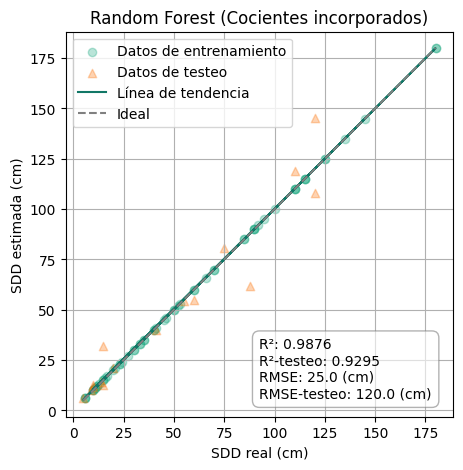

In [3]:
Modelo = RegresionML(X,y, ratios = True)
Modelo.train_rf()
Modelo.graficar()